In [2]:
import numpy as np

# define the environment
class Environment:
    def __init__(self, n_states):
        self.n_states = n_states
        self.state = 0
        self.actions = ['left', 'right']
        self.rewards = [0, 0, 0, 0, 1]

    def step(self, action):
        if action == 'left':
            self.state -= 1
        elif action == 'right':
            self.state += 1

        if self.state < 0:
            self.state = 0
        elif self.state >= self.n_states:
            self.state = self.n_states - 1

        reward = self.rewards[self.state]
        done = False if self.state != self.n_states - 1 else True

        return self.state, reward, done

# define the Q-learning agent
class QAgent:
    def __init__(self, n_states, n_actions, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.Q = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        if np.random.uniform() < self.epsilon:
            action = np.random.choice(self.n_actions)
        else:
            action = np.argmax(self.Q[state])
        return action

    def update(self, state, action, reward, next_state, done):
        if done:
            td_target = reward
        else:
            td_target = reward + self.discount_factor * np.max(self.Q[next_state])
        td_error = td_target - self.Q[state, action]
        self.Q[state, action] += self.learning_rate * td_error

# define the main function to run the simulation
def main():
    env = Environment(n_states=5)
    agent = QAgent(n_states=5, n_actions=2)

    for episode in range(1000):
        state = env.state
        done = False
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(env.actions[action])
            agent.update(state, action, reward, next_state, done)
            state = next_state

    print(agent.Q)

if __name__ == '__main__':
    main()


[[0.         0.        ]
 [0.         0.0943676 ]
 [0.00431338 0.74181021]
 [0.40681364 1.        ]
 [0.9        1.        ]]


[[[4.04043987e-01 2.98812020e-01 4.09286401e-01 4.78296900e-01]
  [4.63402021e-01 2.44410069e-01 3.94597019e-01 5.31441000e-01]
  [4.83894061e-01 4.12456486e-01 4.12279466e-01 5.90490000e-01]
  [5.66325488e-01 4.31704901e-01 5.12236251e-01 6.56100000e-01]
  [6.16449651e-01 7.29000000e-01 5.66573711e-01 6.25134465e-01]]

 [[4.04931726e-01 0.00000000e+00 0.00000000e+00 2.75559624e-02]
  [4.18282527e-01 0.00000000e+00 0.00000000e+00 1.06659898e-02]
  [5.18551340e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [5.84667488e-01 1.33476197e-01 2.04638605e-02 0.00000000e+00]
  [5.59490151e-01 8.10000000e-01 4.36655258e-01 6.88688546e-01]]

 [[3.06048208e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [3.28832343e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [1.00300697e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [5.19267574e-02 7.93342263e-02 5.54653491e-03 8.02917446e-01]
  [7.03166547e-01 9.00000000e-01 6.35847504e-01 7.56297514e-01]]

 [[0.00000000e+00 0.00000000e+00 0

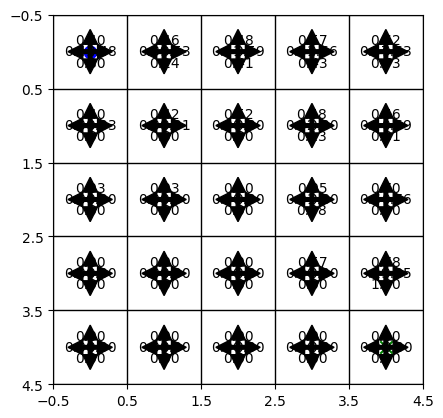

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the grid world
world_size = 5
start_state = (0, 0)
goal_state = (world_size - 1, world_size - 1)
actions = ['up', 'down', 'left', 'right']
num_actions = len(actions)

# Define the Q-learning agent
class QAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((world_size, world_size, num_actions))

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            action = random.choice(range(num_actions))
        else:
            action = np.argmax(self.Q[state])
        return action

    def update(self, state, action, reward, next_state):
        max_q_next_state = np.max(self.Q[next_state])
        td_target = reward + self.gamma * max_q_next_state
        td_error = td_target - self.Q[state][action]
        self.Q[state][action] += self.alpha * td_error

# Define the function to plot the grid world and solution trajectory
def plot_grid_world(Q, path=None):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(-.5, world_size, 1))
    ax.set_yticks(np.arange(-.5, world_size, 1))
    ax.grid(color='black', linewidth=1)
    ax.imshow(np.zeros((world_size, world_size)), cmap='gray_r')

    for i in range(world_size):
        for j in range(world_size):
            state = (i, j)
            if state == start_state:
                marker = 'o'
                color = 'blue'
            elif state == goal_state:
                marker = 'x'
                color = 'green'
            else:
                marker = ''
                color = 'black'
            ax.scatter(j, i, marker=marker, s=80, color=color)

            if path is not None and state in path:
                ax.text(j, i, actions[path.index(state)], ha='center', va='center', color='red')

            for k in range(num_actions):
                q_value = Q[i, j, k]
                dx, dy = 0, 0
                if actions[k] == 'up':
                    dy = -0.3
                elif actions[k] == 'down':
                    dy = 0.3
                elif actions[k] == 'left':
                    dx = -0.3
                elif actions[k] == 'right':
                    dx = 0.3
                ax.arrow(j, i, dx, dy, width=0.05, head_width=0.2, head_length=0.2, length_includes_head=True, color='black')
                ax.text(j+dx/2, i+dy/2, '{:.2f}'.format(q_value), ha='center', va='center')

    plt.show()
    
# Define the main function to run the simulation
def main():
    agent = QAgent()
    num_episodes = 1000

    for episode in range(num_episodes):
        state = start_state
        done = False
        while not done:
            action = agent.choose_action(state)
            if actions[action] == 'up':
                next_state = (max(state[0] - 1, 0), state[1])
            elif actions[action] == 'down':
                next_state = (min(state[0] + 1, world_size - 1), state[1])
            elif actions[action] == 'left':
                next_state = (state[0], max(state[1] - 1, 0))
            elif actions[action] == 'right':
                next_state = (state[0], min(state[1] + 1, world_size - 1))
            if next_state == goal_state:
                reward = 1
                done = True
            else:
                reward = 0
            agent.update(state, action, reward, next_state)
            state = next_state

    print(agent.Q)
    plot_grid_world(agent.Q)

if __name__ == '__main__':
    main()


Solving the optimal trajectory problem using SARSA algorithm

In [3]:
import numpy as np
import random

# Define the environment
# Here, we assume the environment is a 2D grid with a start point (0, 0) and a goal point (4, 4).
# The agent can move in four directions: up, down, left, and right.
# Each move incurs a reward of -1 except for reaching the goal which gives a reward of +10.
# Walls are represented as 1s in the grid.
env = np.zeros((5, 5))
env[1:4, 2] = 1
env[3, 1] = 1
start_state = (0, 0)
goal_state = (4, 4)

# Define the SARSA algorithm
def sarsa(env, start_state, goal_state, num_episodes=5000, alpha=0.1, gamma=0.99, epsilon=0.1):
    Q = np.zeros((env.shape[0], env.shape[1], 4))
    for i in range(num_episodes):
        state = start_state
        action = choose_action(state, Q, epsilon)
        while state != goal_state:
            next_state, reward = take_action(state, action, env)
            next_action = choose_action(next_state, Q, epsilon)
            Q[state[0], state[1], action] += alpha * (reward + gamma * Q[next_state[0], next_state[1], next_action] - Q[state[0], state[1], action])
            state = next_state
            action = next_action
    return Q

# Define the action selection function using epsilon-greedy policy
def choose_action(state, Q, epsilon):
    if np.random.uniform() < epsilon:
        return np.random.randint(4)
    else:
        return np.argmax(Q[state[0], state[1]])

# Define the function to take an action and get the next state and reward
def take_action(state, action, env):
    if action == 0 and state[0] > 0 and env[state[0]-1, state[1]] != 1:
        next_state = (state[0]-1, state[1])
    elif action == 1 and state[0] < env.shape[0]-1 and env[state[0]+1, state[1]] != 1:
        next_state = (state[0]+1, state[1])
    elif action == 2 and state[1] > 0 and env[state[0], state[1]-1] != 1:
        next_state = (state[0], state[1]-1)
    elif action == 3 and state[1] < env.shape[1]-1 and env[state[0], state[1]+1] != 1:
        next_state = (state[0], state[1]+1)
    else:
        next_state = state
    if next_state == goal_state:
        reward = 10
    else:
        reward = -1
    return next_state, reward

# Train the agent and get the optimal policy
Q = sarsa(env, start_state, goal_state)
policy = np.zeros((env.shape[0], env.shape[1]))
for i in range(env.shape[0]):
    for j in range(env.shape[1]):
        policy[i, j] = np.argmax(Q[i, j])

# Print the optimal policy
print("Optimal policy:")
print(policy)


Optimal policy:
[[3. 3. 3. 1. 1.]
 [0. 0. 0. 3. 1.]
 [1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1.]
 [3. 3. 3. 3. 0.]]


## DQN based RL code to navigate between two points in a continuous domain

This code defines an environment in which the agent must navigate from point A at [0.0, 0.0] to point B at [1.0, 1.0] in a continuous domain. The agent is a DQN that takes the current position as input and outputs a 2D action that specifies the direction to move in. The DQN is trained using experience replay, and the exploration rate is decreased over time to encourage exploitation of learned knowledge. The training process consists of running the agent in the environment for a fixed number of episodes, with each episode consisting of a fixed number of steps. At the end of each episode, the agent's total reward is printed.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import deque

: 

: 

In [ ]:
# Define the Deep Q-Network (DQN)
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)  # Replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_decay = 0.995  # Exploration rate decay
        self.epsilon_min = 0.01  # Minimum exploration rate
        self.learning_rate = 0.001  # Learning rate
        self.model = self._build_model()  # Build the DQN

    def _build_model(self):
        model = tf.keras.Sequential()
        model.add(Dense(64, input_dim=self.state_size, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.uniform(low=-1.0, high=1.0, size=self.action_size)
        else:
            return self.model.predict(state.reshape(1, self.state_size)).flatten()

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = np.array(random.sample(self.memory, batch_size))
        states = np.stack(minibatch[:, 0]).reshape(batch_size, self.state_size)
        actions = np.stack(minibatch[:, 1]).reshape(batch_size, self.action_size)
        rewards = minibatch[:, 2]
        next_states = np.stack(minibatch[:, 3]).reshape(batch_size, self.state_size)
        dones = minibatch[:, 4]
        targets = self.model.predict(states)
        next_q_values = self.model.predict(next_states)
        targets[range(batch_size), np.argmax(actions, axis=1)] = rewards + (1 - dones) * self.gamma * np.max(next_q_values, axis=1)
        self.model.fit(states, targets, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Define the environment
class Environment:
    def __init__(self, start_pos, end_pos):
        self.state_size = 2
        self.action_size = 2
        self.start_pos = start_pos
        self.end_pos = end_pos
        self.current_pos = start_pos

    def reset(self):
        self.current_pos = self.start_pos
        return self.current_pos

    def step(self, action):
        self.current_pos += action
        reward = -np.linalg.norm(self.current_pos - self.end_pos)
        done = False
        if np.linalg.norm(self.current_pos - self.end_pos) < 0.1:
            reward = 100.0
            done = True
        return self.current_pos, reward, done

# Train the DQN
if __name__ == "__main__":
    env = Environment(np.array([0.0, 0.0]), np.array([1.0, 1.0]))  # Define the environment
    agent = DQNAgent(env.state_size, env.action_size)  # Create the agent
    batch_size = 32
    episodes = 1000
    for episode in range(episodes):
        state = env.reset()  # Reset the environment
        for step in range(1000):
            action = agent.act(state)  # Get the action from the agent
            next_state, reward, done = env.step(action)  # Execute the action in the environment
            agent.remember(state, action, reward, next_state, done)  # Store the experience in the replay memory
            state = next_state
            agent.replay(batch_size)  # Train the agent on a batch of experiences
            if done:
                print(f"Episode {episode}/{episodes}, Step {step}/{1000}, Reward {reward}")
                break